<a href="https://colab.research.google.com/github/pranavpathak08/MLalgos/blob/main/Implementing_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# K-Means Algorithm implementation


### Data generation for K-means

In [40]:
np.random.randn(10, 2) + np.array([10, 20])

array([[ 8.74180302, 21.16298311],
       [ 9.54748094, 19.16671699],
       [ 8.44943911, 21.08449063],
       [11.13313709, 20.40884292],
       [10.33673892, 19.01977771],
       [10.82665345, 20.36130542],
       [10.92697519, 20.6829186 ],
       [ 9.8842587 , 19.89466752],
       [11.22922674, 19.45080983],
       [10.032536  , 19.28577255]])

In [41]:
np.random.seed(0)
N = 2000 
data1 = np.random.randn(N//3, 2) + np.array([2, 2])
data2 = np.random.randn(N//3, 2) + np.array([-3, -3])
data3 = np.random.randn(N//3, 2) + np.array([-5, 3])

X = np.concatenate((data1, data2, data3))

## Visualise Data

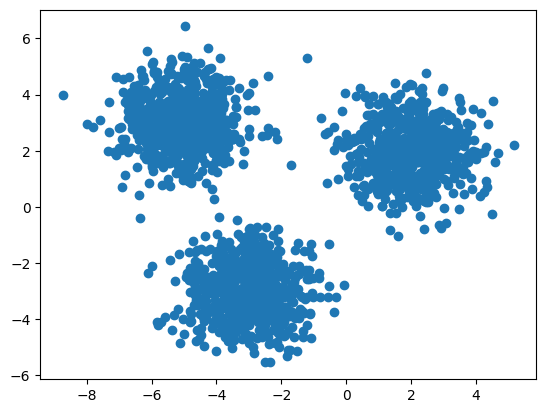

In [42]:
plt.scatter(X[:, 0], X[:, 1])

## Initalise Cluster Centers 

In [44]:
k = 3
random_indices = np.random.randint(0, X.shape[0], k) ## Choosing random cluster centers
cluster_centers = X[random_indices]
cluster_centers


array([[-6.94957179,  2.03989443],
       [-5.74322754,  2.60477793],
       [-2.26844842, -2.68035022]])

## Now we will visualise the cluster centers 

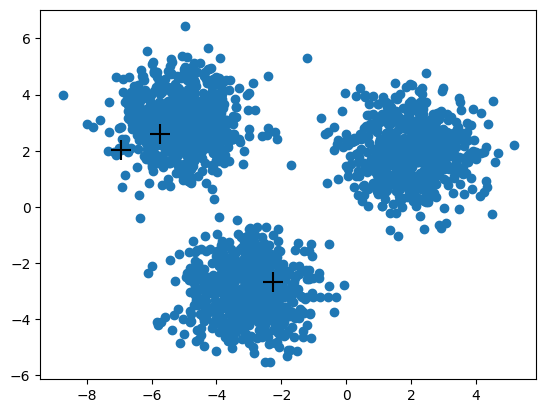

In [45]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="+", s=200, color='k')

## Now we will assign data points to the three clusters, store this information in the cluster indicator (Z)

In [33]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

In [46]:
def identify_cluster_of_each_data_point(X, k, cluster_centers):
  z = np.array([])

  for each in X:
    dists_from_each_center = [np.linalg.norm(cluster_centers[i] - each) for i in range(k)]
    #print(dists_from_each_center)
    chosen_cluster = np.argmin(dists_from_each_center)
    z = np.append(z, chosen_cluster)
  
  return z

In [47]:
z = identify_cluster_of_each_data_point(X, k, cluster_centers)
z

array([2., 2., 2., ..., 1., 1., 1.])

In [18]:
X.shape, cluster_centers.shape

((1998, 2), (3, 2))

## Visualising clusters as per z

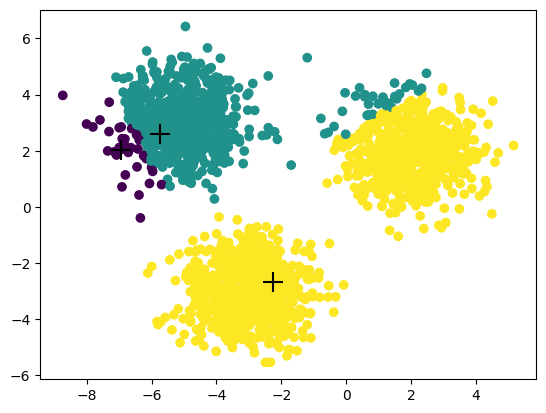

In [48]:
plt.scatter(X[:, 0], X[:, 1], c=z)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="+", s=200, color='k')

## Compute new cluster centers

In [49]:
def compute_cluster_centers(X, z, k):

  cluster_centers = np.array([np.mean(X[z == i], axis=0) for i in range(k)])
  return cluster_centers

## Now we repeat this process untill convergence. So iterations involving are:
1. re-assigning data points to new cluster centers as per the new cluster centers are formed.
2. Re-computer cluster centers

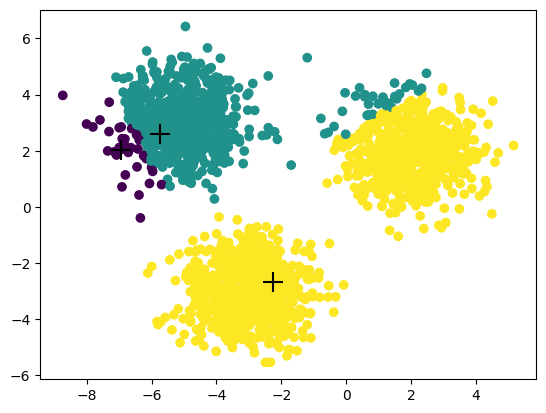

[[-6.7773534   2.01329914]
 [-4.66104064  3.10012252]
 [-0.56924823 -0.62985952]]


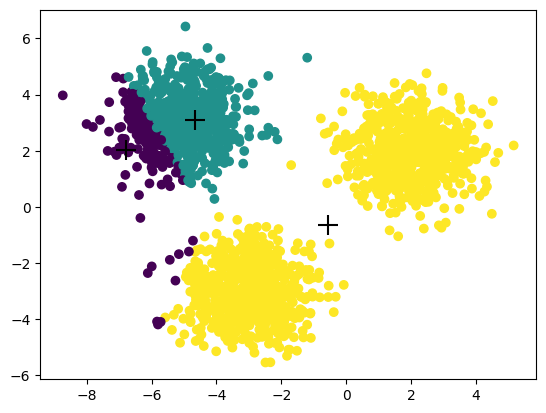

[[-6.21953603  2.19062013]
 [-4.75166797  3.14831587]
 [-0.49151069 -0.49507134]]


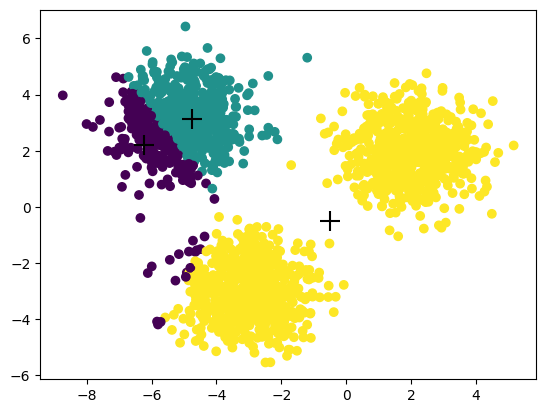

[[-5.93375012  2.0381978 ]
 [-4.68110972  3.28169094]
 [-0.4692225  -0.48805634]]


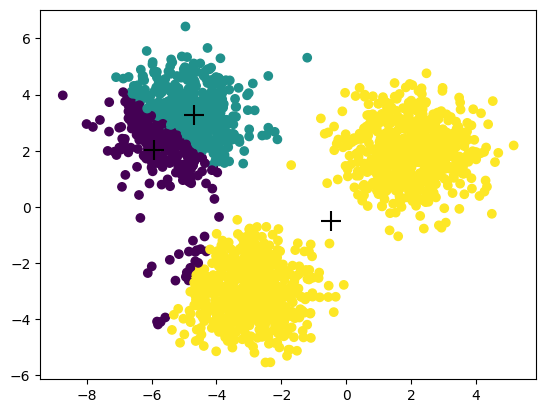

[[-5.67816133  1.75374133]
 [-4.70672999  3.42715143]
 [-0.42715185 -0.47092919]]


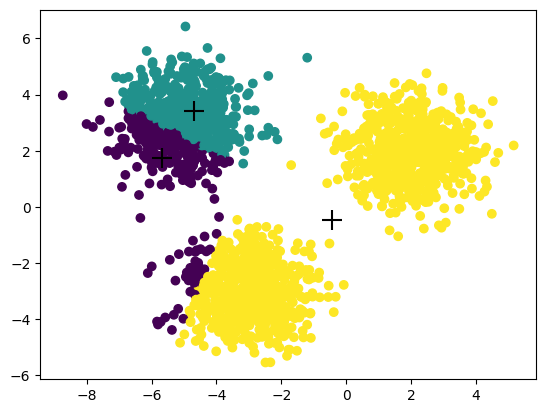

[[-5.47095904  1.3328597 ]
 [-4.81764113  3.48843373]
 [-0.37089445 -0.44082053]]


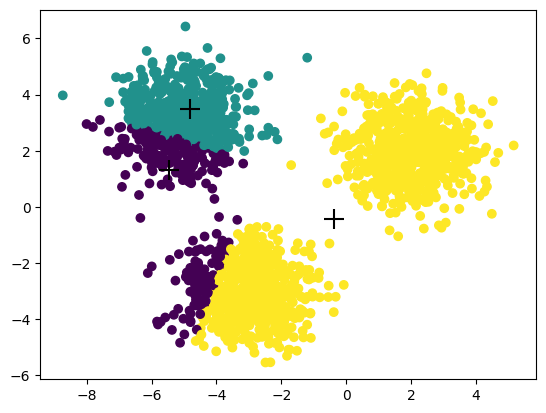

[[-5.12139001  0.36162586]
 [-4.94949759  3.45209304]
 [-0.20428657 -0.34455806]]


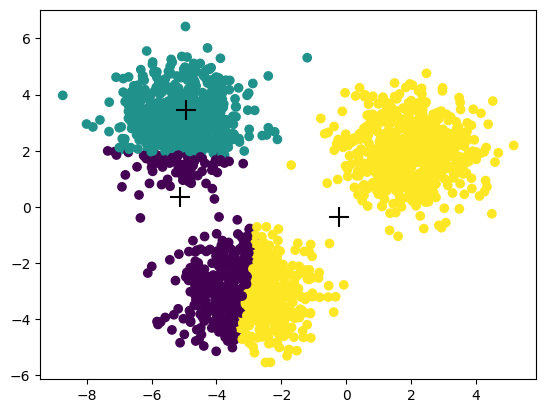

[[-4.15847568 -1.91424598]
 [-5.07735836  3.24433424]
 [ 0.47365656  0.18869859]]


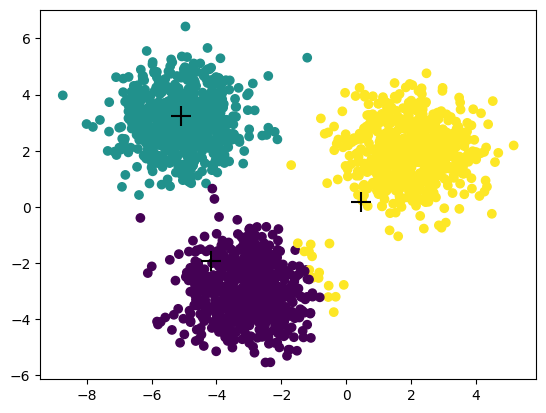

[[-3.10409631 -2.98626636]
 [-5.08821934  3.02120767]
 [ 1.92137886  1.86620869]]


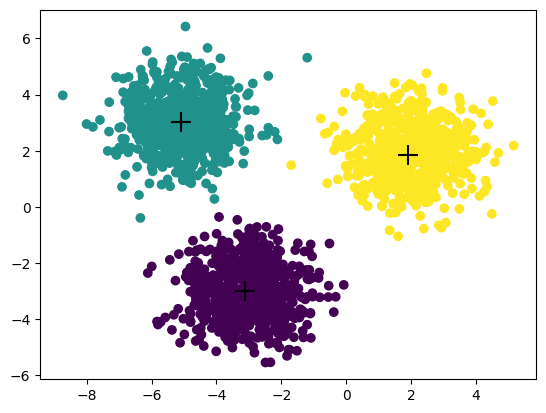

[[-3.04475663 -2.98468709]
 [-5.08711902  3.00839407]
 [ 1.9829719   1.95951297]]


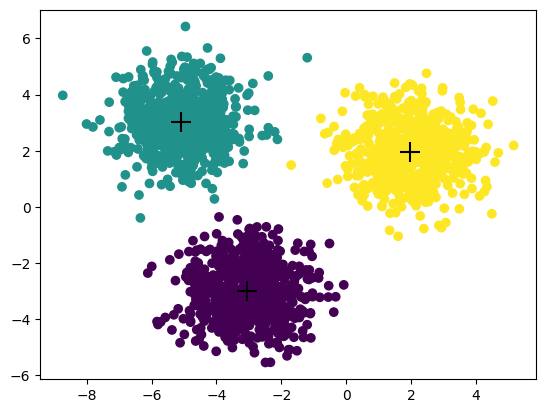

[[-3.04475663 -2.98468709]
 [-5.08711902  3.00839407]
 [ 1.9829719   1.95951297]]


In [50]:
for i in range(10):
  z = identify_cluster_of_each_data_point(X, k, cluster_centers)

  plt.scatter(X[:, 0], X[:, 1], c=z)
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='+', s=200, color='k')
  plt.show()

  cluster_centers = compute_cluster_centers(X, z, k)
  print(cluster_centers)